# Assignment 1 - Linear Algebra


In this exercise, you will investigate various aspects of linear algebra.

* Use appropriate functions
* Comment your code.
* Use numpy/scipy libraries where appropriate, except where explicitly stated.

For each question where you are asked to write some code, you will also be asked to _briefly_ describe what you have done in a text cell below.  


## Introuction

Physics experiments now often produce vast amounts of data which requires accurate and quick processing. This assignment aims to investigate the fundamental numerical methods used in linear algebra to solve physical systems. It starts comparing the accuracy and cases of use for three matrix inversion methods and then explores spectral decomposition in relation to oscillating springs. The code laid out in Q1 and Q2 could, in theory, be used to solve for the normal modes of a large oscillating system where the number of masses N>>2, such as for lattice vibrations. The highly optimised C++ libraries SciPy and Numpy have instead been used.


## Q1

In this part you will need to use the matrix inversion code based on Cramer's rule, posted in the matrix-inversion notebook on Blackboard. Cut and paste the necessary functions into the cell below.

In [23]:
import numpy as np
def det2x2(m):
    if m.shape[0] != 2 or m.shape[1] != 2:
        raise Exception("Non2x2Matrix")
    
    return ( m[0][0]*m[1][1] ) - ( m[0][1]*m[1][0] )

def inverse2x2(m):
    if m.shape[0] != 2 or m.shape[1] != 2:
        raise Exception("Non2x2Matrix")

    det = det2x2(m)
    tmp = np.empty([2,2])
    tmp[0][0] = m[1][1] / det
    tmp[0][1] = -1 * m[0][1] / det
    tmp[1][0] = -1 * m[1][0] / det
    tmp[1][1] = m[0][0] / det
    return tmp
def submatrix(m,i,j):
    if not (m.shape[0] == m.shape[1]):
        raise Exception("NonSquareMatrix")
    
    # create a new matrix
    n = m.shape[0]-1
    tmp = np.empty([n,n])
    
    # get the indices of the matrix that will be used
    tmpi = list(range(m.shape[0]))
    del tmpi[i]
    tmpj = list(range(m.shape[1]))
    del tmpj[j]
    
    for ii in range(n):
        for jj in range(n):
            tmp[ii][jj] = m[tmpi[ii]][tmpj[jj]]

    return tmp
import math
def det(m):
    if not (m.shape[0] == m.shape[1]):
        raise Exception("NonSquareMatrix")
    
    if (m.shape[0]==2):
        return det2x2(m)
        
    else:
        tmp = 0
        # use 0-th row to calculate determinant
        for j in range(m.shape[0]):
            tmp = tmp + (math.pow(-1,j) * m[0][j] * det(submatrix(m,0,j)))
    
    return tmp

def adjugate(m):
    if not (m.shape[0] == m.shape[1]):
        raise Exception("NonSquareMatrix")
    
    tmp = np.empty(m.shape)
    
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            # note the order of indices below !
            tmp[j][i] = (math.pow(-1,i+j) * det(submatrix(m,i,j)))
    return tmp

import scipy.linalg  
def inverse1(m):
    if not (m.shape[0] == m.shape[1]):
        raise Exception("NonSquareMatrix")
    
    if m.shape[0]==2:
        return inverse2x2(m), 
    
    d = det(m)        
    c = adjugate(m)
    
    val = np.true_divide(c,d)
    #uncomment to include custom assertion check
    #test = scipy.linalg.inv(m)
    #assert ( np.allclose( test, val, atol=1e-19) )
    return val

## 1a)
Verify that the code produces the correct result for a single _randomly_ generated, real, 4x4 matrix. Make sure you account for possible rounding error due to limited floating point precision. 

In [24]:
#new function inverse2() includes assertion check
def inverse2(m):
    if not (m.shape[0] == m.shape[1]):
        raise Exception("NonSquareMatrix")
    
    if m.shape[0]==2:
        return inverse2x2(m), 
    
    d = det(m)        
    c = adjugate(m)
    
    val = np.true_divide(c,d)
    test = scipy.linalg.inv(m)
    assert ( np.allclose( test, val, atol=1e-19) )
    return val

#setting up a single randomly generated, real, 4x4 matrix inversion test
n = 4
randommatrix = np.random.rand(n,n)
#uncomment below to include test known matrix
#randommatrix = np.array([[1,1,1],[1,2,-1],[2,3,1]])
inv = inverse2(randommatrix)
print(inv)

[[ 4.83332721 -2.21461779  0.87358925  0.45470961]
 [-1.90960802  0.96390255  1.68160616 -1.44439113]
 [ 7.47435916 -1.14257499 -1.61399855  0.72778635]
 [-4.50441648  1.93094199 -0.72178364  0.72977033]]


## 1b)
Plot the cpu-time taken to solve a randomly generated simultaneous equation as a function of the matrix order N. Your plot should contain 3 lines, for each of the following methods :
1. the matrix inversion function above based on Cramer's rule
2. LU decomposition using scipy
3. SVD decomposition using scipy

Note that you will need to generate both a random real NxN matrix, and a random set of solutions (ie. RHS of the matrix equation). You will need to think about how you're going to handle errors (eg. if you generate a random matrix that is singular). You will need to look up the LU and SVD decomposition routines in the scipy reference manual (https://docs.scipy.org/doc/scipy/reference/), and make sure that your treatment of each routine is "fair", i.e. performs the same calculation.

You may want to read up on these methods in Numerical Recipes. The 3rd edition is available free online at http://numerical.recipes/oldverswitcher.html. LU decomposition is on p48 and SVD decomposition is on p65 in this edition.

Finally, write a paragraph describing your code in the text cell below : how you designed the code, what choices you had to make, and why - in particular how you deal with the issues raised above.

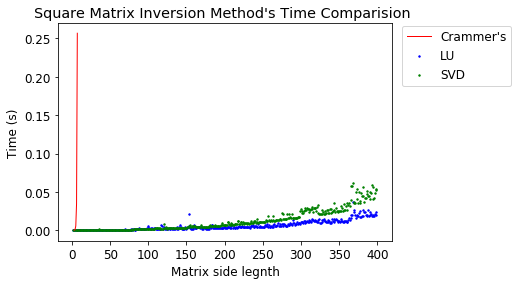

A guide to the eye has been fitted for Crammer's method.


In [29]:
import matplotlib.pyplot as pyp
from time import perf_counter
import scipy.linalg as la


Xval = []
tval = []
tvaler = []

XvalLU = []
tvalLU = []
tvalLUer = []

XvalSVD = []
tvalSVD = []
tvalSVDer = []

upper = 500 


def crammers(randommatrix,randomsol):    
    t0 = perf_counter()
    b= inverse1(randommatrix)
    a = b.dot(randomsol)
    t1 = perf_counter()
    return t1 - t0
        
def LU(randommatrix,randomsol):
    t0 = perf_counter()
    (P, L, U) = la.lu(randommatrix)
    issue = la.inv(P).dot(randomsol)
    half = la.inv(L).dot(issue)
    full = la.inv(U).dot(half)
    t1 = perf_counter()
    total = t1-t0
    (P, L, U) = la.lu(randommatrix)
    return total
    
def svd(randommatrix,randomsol):    
    t0 = perf_counter()
    U,s,Vh = la.svd(randommatrix)
    Ainv = np.dot(Vh.transpose(), np.dot(np.diag(s**-1), U.transpose()))
    Ainv.dot(randomsol)
    t1 = perf_counter()
    total = t1-t0
    return total
higher = 1 # how many times to repeat each size of matrix + 1
for i in range(3,8):
    randommatrix = np.random.rand(i,i)
    randomsol = np.random.rand(i,1)
    crammers(randommatrix,randomsol)
    tval.append(crammers(randommatrix,randomsol))
    Xval.append(i)


for i in range(2,upper):
  tvalLUa = 0
  tvalSVDc = 0
  for b in range(1,higher + 1):
    randommatrix = np.random.rand(i,i)
    randomsol = np.random.rand(i,1)
    tvalLUa += LU(randommatrix,randomsol)/higher
    tvalSVDc += svd(randommatrix,randomsol)/higher
  tvalLU.append(tvalLUa)
  XvalLU.append(i)
  tvalSVD.append(tvalSVDc)
    

pyp.plot(Xval,tval, label = "Crammer's", color='red', lw=1) #label = "Crammers Rule",
pyp.scatter(XvalLU,tvalLU,label = "LU",s=2, color='blue', lw=1)
pyp.scatter(XvalLU,tvalSVD, label = "SVD", color='green',s=2, lw=1) #label = "SVD",
pyp.xlabel('Matrix side legnth')
pyp.ylabel('Time (s)')
pyp.legend(loc='center left', bbox_to_anchor=(1.01, 0.85))
pyp.rcParams['font.size'] = 12
pyp.title("Square Matrix Inversion Method's Time Comparision ")
pyp.xlabel('Matrix side legnth')
pyp.ylabel('Time (s)')
pyp.legend(loc='center left', bbox_to_anchor=(1.01, 0.85))
pyp.show();

print('A guide to the eye has been fitted for Crammer\'s method.')

# For large n the the following results were found.

![title](10.png)

These graphs show that for all three methods time taking to calculate the inverse of an n by n matrix increases exponentially, why LU method being quicker from around n = 40. The code above allows a custom number of repeats for each value of n. Calculation of the standard deviation for each value of n would be desirable and allows chi-squared fit testing. 

## 1c)
Now discuss the results you obtained above. Can you explain the results in terms of the number of operations performed by each function ?  You might want to look up the **computational complexity** of these algorithms.  How well do the curves conform to your explanation ?

Crammers rules not optimised C++ code
SVD initialy a bit slower becomes faster error? 
LU in itialy fast but also not really suited for this after for about a 40 by 40.
cross over of efficient at
The Lower Upper Decomposition (LUD) is a method
of linear algebra which uses Guassian elimination, it utilises
the characteristic of triangular matrices being simple to solve.
The Singlular Value
Decomposition (SVD) is another method which decomposes
the matrix into a form which is simpler to solve, this method
decomposes the matrix as shown in equation (8)
A = USV (8)
Where U and V are orthonormal matrices and S is a diagonal matrix with the diagonal matrix elements as the singular
values

A routine was written for calculating the inverse of an nxn

 As the matrix size gets
larger the deviations from the main trend grow more frequent
for both LUD and SVD, suggesting that a greater matrix size
causes the varying input data to affect run time more strongly.

Choices made



## 1d)
Next, we will study the precision of the algorithms - in particular, for near singular matrices. Write a routine that will estimate (and plot) the precision of the result when solving the equation below, for small values of k. Your function should do this for all 3 routines studied in Q1b).

\begin{eqnarray*}
x + y + z & = & 5 \\
x + 2y - z & = & 10 \\
2x + 3y +kz & = & 15 
\end{eqnarray*}

You will need to choose a method to estimate the precision, given that the equation solvers will return values for all of x, y, and z.

As before, describe the functionality of the code and the choices you made writing it in the text cell below.

C:\Users\us\Anaconda3.6\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.815337484665734e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\us\Anaconda3.6\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.851107499269305e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\us\Anaconda3.6\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.31184828209486e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\us\Anaconda3.6\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guarante

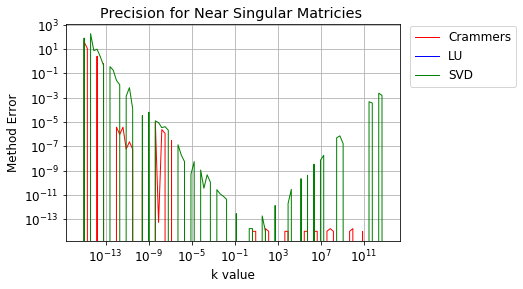

In [30]:
import scipy.linalg as la
import matplotlib.pyplot as pyp


def crammers(randommatrix,sol):    
    b= inverse1(randommatrix)
    a = b.dot(sol)
    ender = a.transpose().dot(a)
    return(ender[0][0]-25)
    
        
def LU(randommatrix,sol):
    (P, L, U) = la.lu(randommatrix)
    issue = la.inv(P).dot(sol)
    half = la.inv(L).dot(issue)
    full = la.inv(U).dot(half)
    (P, L, U) = la.lu(randommatrix)
    ender = full.transpose().dot(full)
    return(ender[0][0]-25)
    
def svd(randommatrix,sol):    
    U,s,Vh = la.svd(randommatrix)
    d = np.matmul(U.T,sol)
    z = la.solve(np.diag(s),d)
    x = np.matmul(Vh.T,z)
    column = x
    ##Ainv = np.dot(Vh.transpose(), np.dot(np.diag(s**-1), U.transpose()))
    ##column = Ainv.dot(sol) 
    #print(x)
    ender = column.transpose().dot(column)
    #ender[0][0]-25
    return(ender[0][0]-25)

icval = []
diffCval = []
ivalLU = []
diffLUval = []
diffSVDval = []

total = 0 
upper=3
import time
import scipy.linalg as la


first = 10000000000000
counter = 0
n=95
rangez = np.zeros(n) #setting up array of k values
last = 0.00000000000001
for counter in range(0,n):
  rangez[counter] = first
  first = first/2
  
  
for i in rangez:
    counter = 0
    while counter <5:
      randommatrix = np.array([[1.,1.,1.],[1.,2.,-1.],[2.,3.,1.]])
      randommatrix[2][2] = i
      sol = np.array([[5],[10],[15]])
      icval.append(i)
      diffCval.append(crammers(randommatrix,sol))
      ivalLU.append(i)
      diffLUval.append(LU(randommatrix,sol))
      diffSVDval.append(svd(randommatrix,sol))
      counter +=1
    
    

pyp.figure(1)
pyp.grid()
pyp.xscale("log")
pyp.yscale("log")
pyp.plot(icval,diffCval,'red',label = "Crammers",lw =1) 
pyp.plot(ivalLU,diffLUval,'blue',label = "LU",lw =1) 
pyp.plot(ivalLU,diffSVDval,'green',label = "SVD",lw =1) 
pyp.xlabel('k value')
pyp.ylabel('Method Error')
pyp.legend(loc='center left', bbox_to_anchor=(1.01, 0.85))
pyp.rcParams['font.size'] = 12
pyp.title("Precision for Near Singular Matricies ")
pyp.show()

LU is at 0 and constant. 

## 1e)
Discuss your results in the test box below. You should describe the behaviour of each algorithm as k goes to 0, and explain what is happening in each case. How would these results affect your choice of algorithm ?

The results do not agree with the literature for SVD[1]. The error was calculation here requires improvement, the dot product column vector with its self is losing some precision however crammers rules does generally follow whats expected.



## Q2
This question is on eigenvalue problems.  

## 2a)
In this part you should write a function that will find the eigenvector/eigenvalues of a Hermitian matrix A using "Rayleigh quotient iteration". The algorithm is as follows :

1. An initial values for the eigenvalue $\mu_0$ and eigenvector $b_0$ must be supplied

2. The next approximation of the eigenvector is given by :
$$b_{i+1} = \frac{(A-\mu_i I)^{-1}b_i}{|(A-\mu_i I)^{-1}b_i|}$$

3. The corresponding eigenvalue is given by :

$$\mu_{i+1} = \frac{b^*_{i+1}Ab_{i+1}}{b^*_{i+1}b_{i+1}}$$

4. Now iterate steps 2 and 3 until convergence is reached for a specified precision, ie.
$$\mu_{i+1} - \mu < a_{tol}$$

(Note that the numerator in 2. can also be found by solving $(A-\mu_i I)x = b$) 

Your function should take arguments for the matrix A, the initial estimates of eigenvalue and eigenvector, and the precision required (ie. a convergence condition). You should use vector and matrix algebra routines from numpy and scipy.linalg for the operations described above. For simplicity, you can restrict your work to real symmetric matrices.

Explain the choices you made when writing this code in the text cell below.

In [33]:
import random
from pylab import *
import numpy as np

counter = 0
def RayleighQuotientIteration(A,max_iter,v):
  LinAlgError=True
  I = np.identity(A.shape[0])
  #v = [ 0.28068373,0.27594281,-0.78834196]
  mu = np.random.randint(0,50)
  print('trial')
  #print(v,"= guess")
  while LinAlgError:
    v = np.random.randn(A.shape[0])
    try:
      v /= np.linalg.norm(v) 
      v = np.random.randn(A.shape[0])
      LinAlgError=False
    except LinAlgError:
      LinAlgError=True  
  v /= np.linalg.norm(v)
  mu = np.dot(v,np.dot(A,v))
  for t in range(max_iter):
    v=np.linalg.solve(mu*I-A,v)
    v/=np.linalg.norm(v)
    mu = np.dot(v,np.dot(A,v))
    # add nice print thing here
  v = np.around(v,decimals = 4)
  mu = round(mu,4)
  return(v,mu)

def RayleighQuotientIteration2(A,max_iter,v):
    counter = 0
    mu1=0
    v1=0
    mu2=0
    v2=0
    mu3=0
    v3= 0
    v1,mu1 = RayleighQuotientIteration(A,max_iter,v)
    keep = 1
    print(mu1,'first eigenvalue',v1,'first eigenvector')
    while keep == 1:
        v2,mu2 = RayleighQuotientIteration(A,max_iter,v)
        if mu1 == mu2:
          keep = 1
        if mu1 != mu2:
          if counter ==0:
           print(mu2,'second eigenvalue',v2,'second eigenvector')
           counter += 1
           while counter == 1:
              v3,mu3 = RayleighQuotientIteration(A,max_iter,v)
              if mu1 != mu3 and mu2 != mu3 and mu3 != 0:
                  print(mu3,'third eigenvalue',v3,'third eigenector')
                  keep = 2  
                  counter+= 1
                  break
              else:
                  pass
       
def RayleighQuotientIteration3(A,max_iter,v):
    Error=True
    while Error:
        try:
            return(RayleighQuotientIteration2(A,max_iter,v))
            Error=False
        except LinAlgError:
             Error=True
             print("#######RESET#######")   

In general, Rayleigh quotient iteration (RQI) will need fewer iterations to find an eigenvalue than inverse iteration.

### 2b)
Now test your function using a matrix with known eigenvalues / vectors. You can use :
$$\left(\begin{array}{ccc} 1 & 2 & 3 \\ 1 & 2 & 1 \\ 3 & 2 & 1 \end{array}\right)$$

The leading eigenvalue of this matrix is $\sqrt{5}+3$, which corresponds to the eigenvector :
$$\left(\begin{array}{c} 1 \\ \frac{\sqrt(5)-1}{2} \\ 1 \end{array}\right)$$

In [34]:
A=  np.array([[1,2,3],[1,2,1],[3,2,1]])
print(A, "= test matrix")
max_iter =10
v = np.random.randn(A.shape[0])
RayleighQuotientIteration3(A,max_iter,v)


[[1 2 3]
 [1 2 1]
 [3 2 1]] = test matrix
trial
0.7639 first eigenvalue [ 0.4653 -0.7529  0.4653] first eigenvector
trial
#######RESET#######
trial
5.2361 first eigenvalue [-0.6479 -0.4004 -0.6479] first eigenvector
trial
0.7639 second eigenvalue [-0.4653  0.7529 -0.4653] second eigenvector
trial
trial
trial
trial
trial
trial
-2.0 third eigenvalue [ 0.7071  0.     -0.7071] third eigenector


## 2c)
Your function should find one eigenvalue of a Hermitian (or real symmetric) matrix, along with it's corresponding eigenvector. Can you think of a method to find the other eigenpairs ?  Can you use the fact that the eigenvectors of a real symmetric matrix are orthogonal ? Discuss a possible algorithm to find further eigenpairs in the text box below, and use the code cell below if you want to write some code to demonstrate your answer. 

Power Iteration consists of a matrix-vector multiplication O(n2), while the Rayleigh Quotient iteration requires the solving a system of equations O(n3). [2] While loops have been used to prevent the function from breaking due to errors.

In [ ]:
#See code for parts 2a) and 2b)

## Q3

For this question you should write a function that will find the eigenvalues of the coupled system of oscillators shown below.

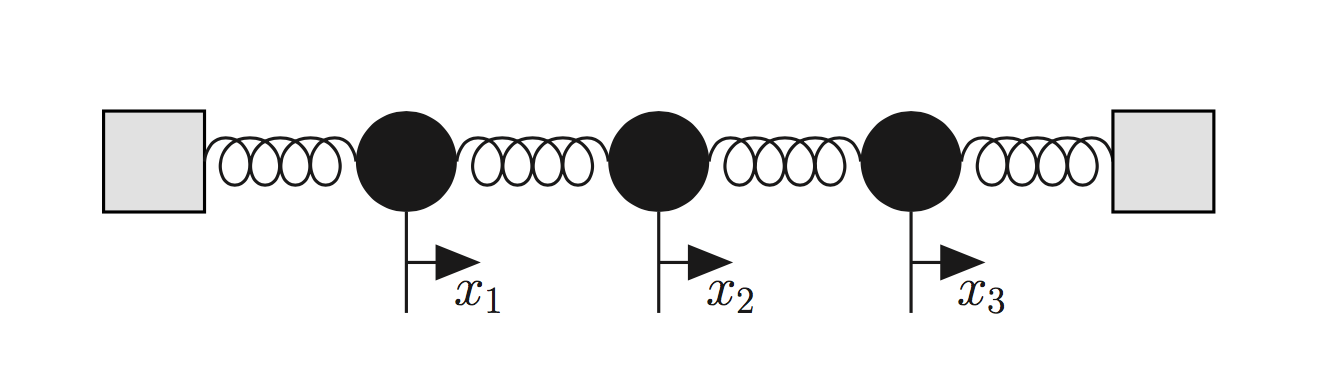

If the displacement of the $i$th mass from its equilibrium position is denoted as $x_i$, the force on the mass is given by the tension in the two springs as :

$$F_i = −k(x_i − x_{i−1}) + k(x_{i+1} − x_i) = −k(2x_i − x_{i−1} − x_{i+1})$$

We can assume that there are normal mode solutions, i.e. solutions of the form $x_i = z_i e^{i\omega t}$ in which all masses oscillate with the same frequency $\omega$ but with unknown phasors $z_i$. Then the above equation becomes :

$$F_i = m\ddot{x}_i = −m\omega^2x_i = −k(2x_i − x_i−1 − x_i+1)$$

This is one row of a matrix equation describing the entire system :

$$m\omega^2x_i \left(\begin{array}{c} \vdots \\ \\ x_i \\ \\ \vdots \end{array}\right) = 
\left(\begin{array}{ccccccc} & & & \vdots & & & \\ \cdots & 0 & -1 & 2 & -1 & 0 & \cdots \\ & & & \vdots & & & \end{array}\right)
\left(\begin{array}{c} \vdots \\ x_{i-1} \\ x_i \\ x_{i+1} \\ \vdots \end{array}\right)
$$

This example is a typical eigenvalue problem, in that many of the matrix elements are zero, which can greatly simplify the computational challenge and make even large systems solvable.

## 3a)
Write a function in the cell below that will calculate the normal modes and corresponding oscillation frequencies for a system of three identical masses connected by identical springs as shown above.

As for previous questions, briefly describe how your code works and the choices you made when writing it in the text cell below.

In [35]:
import numpy as NP
from scipy import linalg as LA
N_Masses = 3

A_1=np.diag(2*np.ones(N_Masses), 0)
A_2=np.diag(-1*np.ones(N_Masses-1), 1)
A_3=np.diag(-1*np.ones(N_Masses-1), -1)
A=A_1+A_2+A_3
    
print(A, 'Mass spring sytem Matrix representation')
e_vals,e_vecs = LA.eig(A)
e_vals,e_vecs = LA.eig(A)
print (np.real(np.around(e_vals,decimals = 4)),"Eigenvalues")

frequency= np.around(np.sqrt(e_vals), decimals = 4)
frequency = np.real(frequency)
#square root to give angular frequencies
print(frequency, 'Angular Frequencies')
print ("Eigenvectors")
e_vecs= np.around(e_vecs, decimals = 4)
print(e_vecs)


[[ 2. -1.  0.]
 [-1.  2. -1.]
 [ 0. -1.  2.]] Mass spring sytem Matrix representation
[3.4142 2.     0.5858] Eigenvalues
[1.8478 1.4142 0.7654] Angular Frequencies
Eigenvectors
[[-0.5    -0.7071  0.5   ]
 [ 0.7071  0.      0.7071]
 [-0.5     0.7071  0.5   ]]


General solution for linear combination of three modes.

\begin{equation}
Eqn. (1)
\left[ \begin{array}{c} \ddot x_1 \\ \ddot x_2 \\ \ddot x_3 \end{array}\right]=
A\left [\begin{array}{c} -0.5 \\-0.71 \\0.5  \end{array}\right ]\exp(i(3.4t))+
B\left [\begin{array}{c} -0.71 \\0 \\-0.5 \end{array}\right ]\exp(i(2t))+
C\left [\begin{array}{c} 0.5  \\0.71 \\0.5  \end{array}\right ]\exp(i(0.59t))
\end{equation}

Where $A$,$B$ and $C$ are constants to be determined from the initial conditions.


The code above allows the frequency and normal modes to be calcualted for a N by changing the value of N_Masses.

## 3b)
Discuss your results above. Describe the physical interpretation of each mode you have found ? How does the behaviour change if the springs at either end are removed ?

**Use this cell for your answer**

In [36]:
N_Masses = 3
A_1=np.diag(int(2)*np.ones(N_Masses), 0)
A_2=np.diag(int(-1)*np.ones(N_Masses-1), 1)
A_3=np.diag(int(-1)*np.ones(N_Masses-1), -1)
A=A_1+A_2+A_3

A[0][0]=1
A[N_Masses-1][N_Masses-1]=1

print(A)
e_vals,e_vecs = LA.eig(A)
e_vals,e_vecs = LA.eig(A)
print (np.real(np.around(e_vals,decimals = 4)),"Eigenvalues")

frequency= np.around(np.sqrt(e_vals), decimals = 4)
frequency = np.real(frequency)
#square root to angular frequencies
print(frequency, 'Angular Frequencies')
print ("Eigenvectors")
e_vecs= np.around(e_vecs, decimals = 4)
print(e_vecs)

[[ 1. -1.  0.]
 [-1.  2. -1.]
 [ 0. -1.  1.]]
[ 3.  1. -0.] Eigenvalues
[1.7321 1.     0.    ] Angular Frequencies
Eigenvectors
[[-0.4082 -0.7071  0.5774]
 [ 0.8165  0.      0.5774]
 [-0.4082  0.7071  0.5774]]


The normal modes have changed, the boundary conditions will cause the normal modes for the third column to be seen as translational motion. Boundary conditions have changed however the first two columns of eigenvectors resemble those for 3a). Plotting the real values for the positions given by Eqn. (1) against time would be a helpful extension of this exercise.

## Conclusion
LU decomposition appears to be the more accurate and faster method for matrix inversion despite best use not being made of the LU method as a new set of solutions was randomly generated for each inversion, not allowing the retention of the decomposition into two triangular matrices to be reused. It is clear that there is no general answer and the values in the matrix will determine the most suitable method for operating on it. Matplitlib was deemed not suitable for plotting complex fits or errors, writing results to a file and processing them in Origin is desirable. 


## References
[1] EDWARD ROSTEN,*Toon*,Produced 18/2/2013,Viewed 18/12/2019 https://www.edwardrosten.com/cvd/toon/html-user/sCramerIsBad.html <br/>
[2] Parlett, B. N., The Symmetric Eigenvalue Problem. Prentice‐Hall Series in Computational Mathematics. Englewood Cliffs, N.J. 07 632. Prentice‐Hall, Inc. 1980. XX, 348 S., $ 25.00. ISBN 0‐13‐880047‐2